In [125]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import torch
import numpy as np
import math
plt.rcParams.update({'figure.max_open_warning': 0})

In [126]:
def sim_ring(N, period, radius, noise_std):
    rads = np.ones(N) * radius
    noise = np.random.normal(0.0, noise_std, N)
    rads = rads + noise
    angles = np.linspace(0, period * 2 * math.pi, N, endpoint=False)
    x = np.cos(angles) * rads
    y = np.sin(angles) * rads
    pos = np.concatenate((x[:, None], y[:, None]), -1)
    return pos, rads, angles

def sim_square(N, period, radius, noise_std):
    upper_x = np.linspace(-radius, radius, int(N / period / 4), endpoint=False)
    upper_y = np.ones(int(N / period / 4)) * radius
    lower_x = np.linspace(-radius, radius, int(N / period / 4), endpoint=False)
    lower_y = np.ones(int(N / period / 4)) * (-radius)
    left_y = np.linspace(-radius, radius, int(N / period / 4), endpoint=False)
    left_x = np.ones(int(N / period / 4)) * (-radius)
    right_y = np.linspace(-radius, radius, int(N / period / 4), endpoint=False)
    right_x = np.ones(int(N / period / 4)) * (radius)
    x = np.concatenate((upper_x, right_x, lower_x, left_x), 0)
    y = np.concatenate((upper_y, right_y, lower_y, left_y), 0)
    pos = np.concatenate((x[:, None], y[:, None]), -1)
    rads = np.sqrt(pos[:, 0]**2 + pos[:, 1]**2)
    angles = np.arctan2(pos[:, 1], pos[:, 0])
    return pos, rads, angles

def sim_cross(N, period, radius, noise_std):
    vertical_x = np.zeros(int(N / period / 2))
    vertical_y = np.linspace(-radius, radius, int(N / period / 2), endpoint=False)
    horizon_x = np.linspace(-radius, radius, int(N / period / 2), endpoint=False)
    horizon_y = np.zeros(int(N / period / 2))
    x = np.concatenate((vertical_x, horizon_x), 0)
    y = np.concatenate((vertical_y, horizon_y), 0)
    pos = np.concatenate((x[:, None], y[:, None]), -1)
    rotation = np.pi / 4
    rotation_matrix = np.array([[np.cos(rotation), -np.sin(rotation)], [np.sin(rotation), np.cos(rotation)]])
    pos = np.matmul(pos, rotation_matrix)
    rads = np.sqrt(pos[:, 0]**2 + pos[:, 1]**2)
    angles = np.arctan2(pos[:, 1], pos[:, 0])
    return pos, rads, angles

In [118]:
def plot_shape(pos, rads, angles):
    fontsize=14
    gs = gridspec.GridSpec(1, 5)
    gs.update(left=0.0 , bottom=0.0, right=1.0, top=1.0, wspace=0.2, hspace=1)
    fig = plt.figure(figsize=(20, 4))
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1:3])
    ax3 = fig.add_subplot(gs[0, 3:])
    ax1.scatter(pos[:,0], pos[:, 1], s=10, c='b')
    ax1.set_xlim(-3, 3)
    ax1.set_ylim(-3, 3)
    ax1.set_xlabel('x-pos', fontsize=fontsize)
    ax1.set_ylabel('y-pos', fontsize=fontsize)
    ax2.scatter(angles, rads, s=10, c='r')
    ax2.set_ylim(0, 4)
    ax2.set_xlabel('angle', fontsize=fontsize)
    ax2.set_ylabel('radius', fontsize=fontsize)
    ax3.scatter(angles, pos[:, 0], s=10, c='m')
    ax3.scatter(angles, pos[:, 1], s=10, c='orange')
    ax3.set_xlabel('angle', fontsize=fontsize)
    ax3.set_ylabel('position', fontsize=fontsize)

In [119]:
N = 100
period = 2
radius = 2.0
noise_std = 0.1

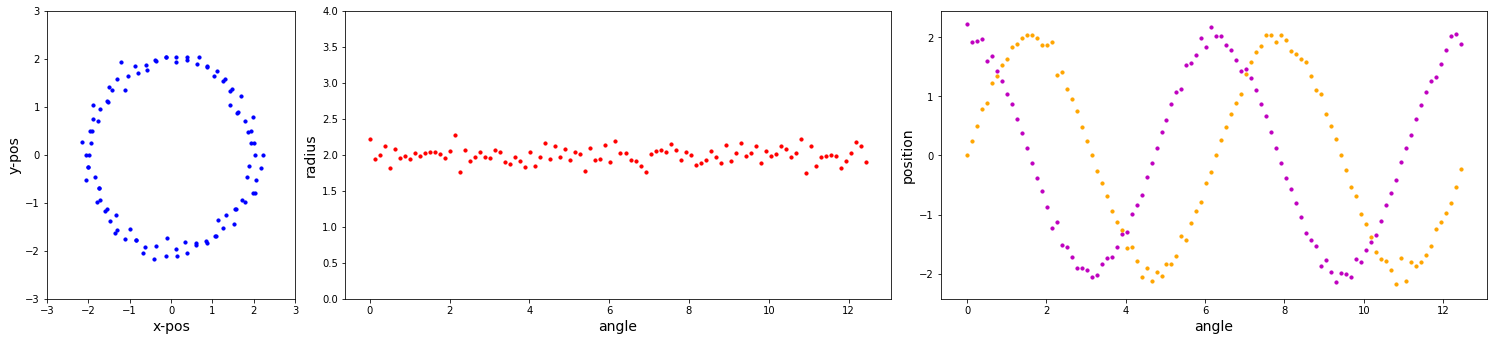

In [105]:
pos, rads, angles = sim_ring(N, period, radius, noise_std)
plot_shape(pos, rads, angles)

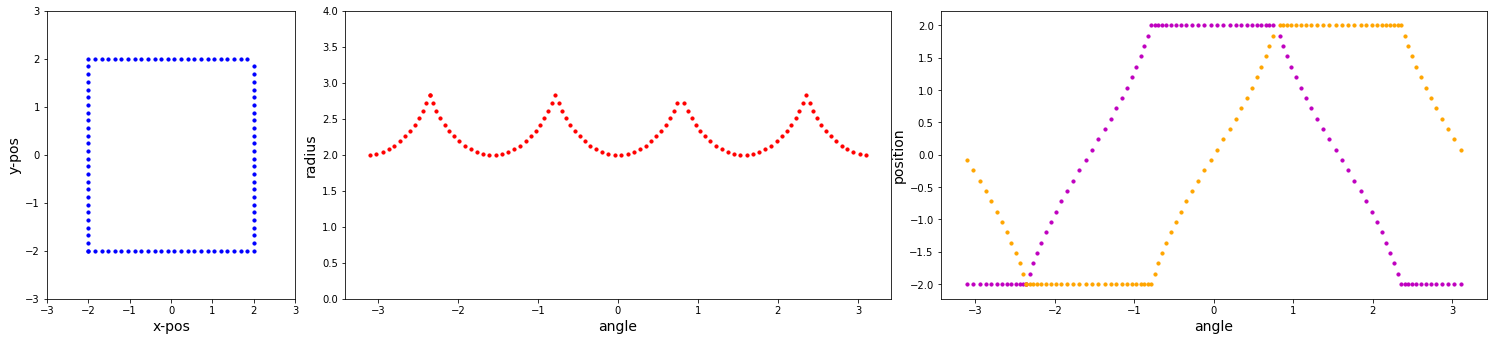

In [112]:
pos, rads, angles = sim_square(N, 1, radius, noise_std)
plot_shape(pos, rads, angles)

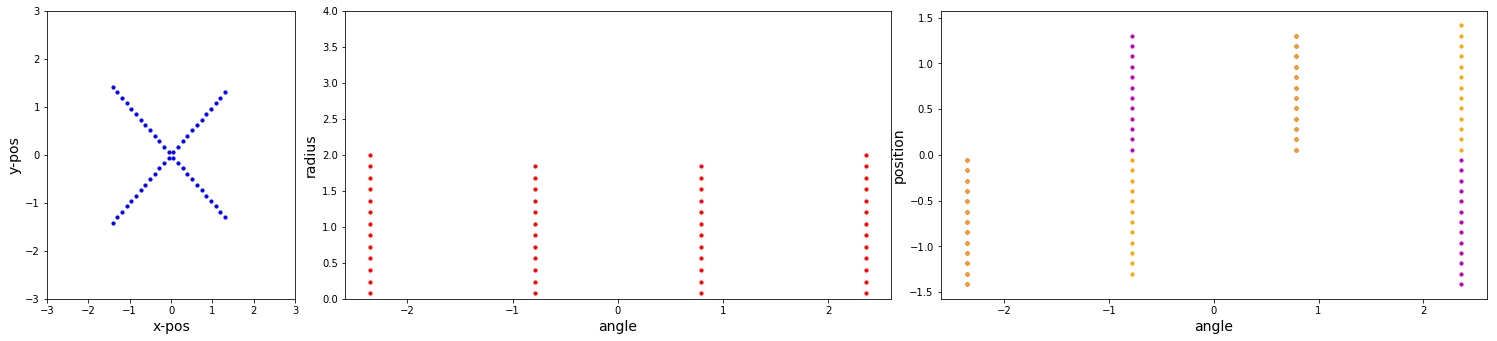

In [124]:
pos, rads, angles = sim_cross(N, period, radius, noise_std)
plot_shape(pos, rads, angles)

In [132]:
x = np.linspace(0, 4 /np.pi, 100, endpoint=True)
T = 4 / np.pi
y = (4 / T**2) * (x - (T / 2))**2

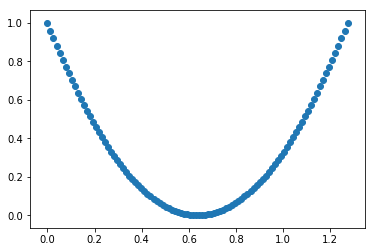

In [133]:
plt.scatter(x, y)